In [30]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

print("Libraries Imported Successfully")

Libraries Imported Successfully


In [31]:


df = pd.read_csv("/kaggle/input/datasets/emrullahdemirhan/titaniccsv/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:


df.info()

print("\nMissing Values:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

In [33]:

df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

print("Missing values handled successfully")

Missing values handled successfully


/tmp/ipykernel_55/2371206650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_55/2371206650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [34]:



bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


df['FamilySize'] = df['SibSp'] + df['Parch']

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0


In [35]:


age_survival = df.groupby('AgeGroup')['Survived'].mean()

print(age_survival)

AgeGroup
Child      0.579710
Teen       0.381818
Adult      0.364769
Mid-Age    0.390625
Senior     0.227273
Name: Survived, dtype: float64


/tmp/ipykernel_55/2903801650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean()


In [36]:


embark_survival = df.groupby('Embarked')['Survived'].mean()

print(embark_survival)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [37]:


family_survival = df.groupby('FamilySize')['Survived'].mean()

print(family_survival)

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


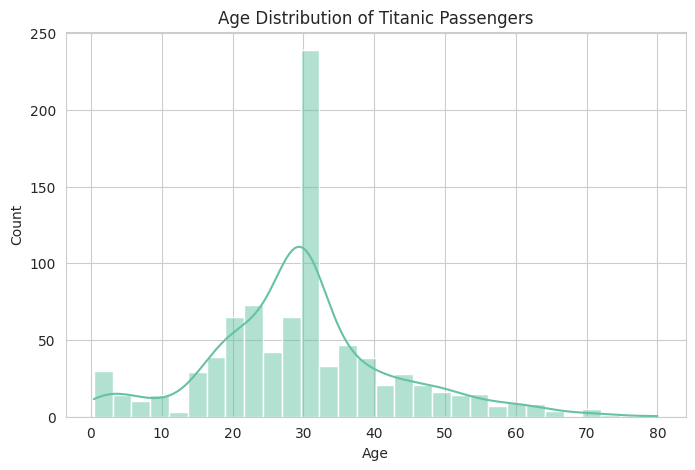

In [38]:


plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)

plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

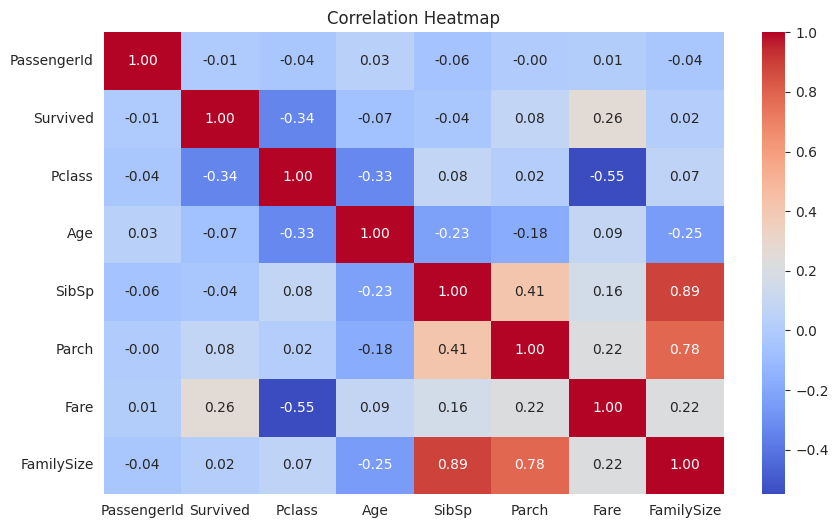

In [39]:


plt.figure(figsize=(10,6))

sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")

plt.title("Correlation Heatmap")

plt.show()

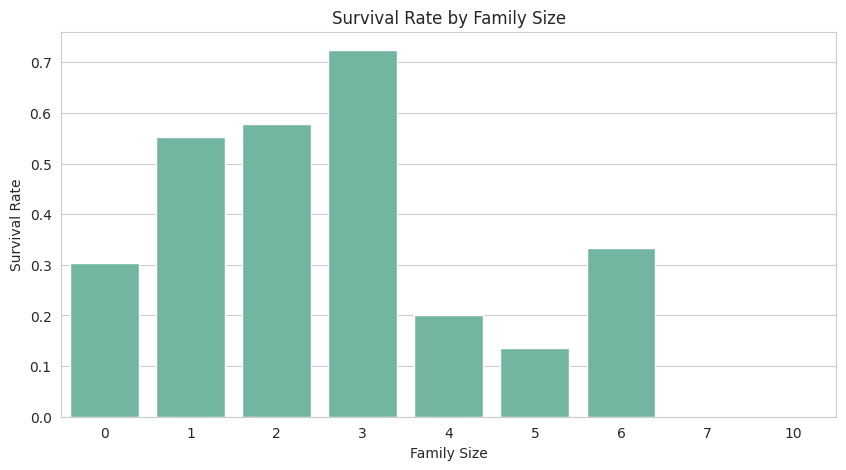

In [40]:


plt.figure(figsize=(10,5))

sns.barplot(x=family_survival.index,
            y=family_survival.values)

plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")

plt.show()

In [41]:


sns.set_style("whitegrid")
sns.set_palette("Set2")

print("Style Updated")

Style Updated
